<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/data_und_new_jona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


In [6]:
df_incidents = pd.read_csv('data/incidents.csv')

<ipython-input-6-d678441d16c1>:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_incidents = pd.read_csv('data/incidents.csv')


# Basic Information about the Incidents Data Set

In [ ]:
# Display the first few rows of the dataset to get a feel for the data
print(df_incidents.head())

         date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0                    2.0   
3     

In [ ]:
# Basic Info
print(df_incidents.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

# Descriptive Statistics

In [ ]:
#Describe categorical columns
print(df_incidents.select_dtypes(include=['object']).describe())


              date     state city_or_county                  address  \
count       239677    239677         239677                   223180   
unique        2437        51          12898                   198037   
top     2017-01-01  Illinois        Chicago  2375 International Pkwy   
freq           342     17556          10814                      160   

       participant_age_group1 participant_gender1 min_age_participants  \
count                  197558              203315               164879   
unique                      3                   3                12673   
top                 Adult 18+                Male                 19.0   
freq                   181324              177945                 7981   

       avg_age_participants max_age_participants n_participants_child  \
count                165057               164969               197573   
unique                12869                12852                   32   
top                    22.0                 24.0 

In [ ]:
#Describe numerical data - integers
print(df_incidents.select_dtypes(include=['int64']).describe())


            n_killed      n_injured
count  239677.000000  239677.000000
mean        0.252290       0.494007
std         0.521779       0.729952
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       1.000000
max        50.000000      53.000000


In [ ]:
#Describe numerical data - floats
print(df_incidents.select_dtypes(include=['float64']).describe())


            latitude      longitude  congressional_district  \
count  231754.000000  231754.000000           227733.000000   
mean       37.546598     -89.338348                8.001265   
std         5.130763      14.359546                8.480835   
min        19.111400    -171.429000                0.000000   
25%        33.903400     -94.158725                2.000000   
50%        38.570600     -86.249600                5.000000   
75%        41.437375     -80.048625               10.000000   
max        71.336800      97.433100               53.000000   

       state_house_district  state_senate_district  participant_age1  \
count         200905.000000           207342.00000     147379.000000   
mean              55.447132               20.47711         30.295707   
std               42.048117               14.20456         13.363592   
min                1.000000                1.00000          0.000000   
25%               21.000000                9.00000         21.000000   


In [ ]:
# Identify columns with mixed types
mixed_type_cols = df_incidents.applymap(type).nunique() > 1
mixed_cols = mixed_type_cols.index[mixed_type_cols].tolist()

print("Columns with mixed types:", mixed_cols)

# For each mixed-type column, identify the unique types
for col in mixed_cols:
    unique_types = df_incidents[col].apply(type).unique()
    print(f"Unique types in column {col}: {unique_types}")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3660\1396059857.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mixed_type_cols = df_incidents.applymap(type).nunique() > 1


Columns with mixed types: ['address', 'participant_age_group1', 'participant_gender1', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'notes', 'incident_characteristics1', 'incident_characteristics2']
Unique types in column address: [<class 'str'> <class 'float'>]
Unique types in column participant_age_group1: [<class 'str'> <class 'float'>]
Unique types in column participant_gender1: [<class 'str'> <class 'float'>]
Unique types in column min_age_participants: [<class 'str'> <class 'float'>]
Unique types in column avg_age_participants: [<class 'str'> <class 'float'>]
Unique types in column max_age_participants: [<class 'str'> <class 'float'>]
Unique types in column n_participants_child: [<class 'float'> <class 'str'>]
Unique types in column n_participants_teen: [<class 'float'> <class 'str'>]
Unique types in column n_participants_adult: [<class 'float'> <class 'str'>]
Unique types in column 

# Null Values or Missing values

In [ ]:
#Find nulls in all the columns
print(df_incidents.isnull().sum())


date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         74798
avg_age_participants         74620
max_age_participants         74708
n_participants_child         42104
n_participants_teen          42099
n_participants_adult         42102
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
dtype: int64


# Check for Errors in Various Fields

In [ ]:
# Check for the presence of future dates

df_incidents['date'] = pd.to_datetime(df_incidents['date'])

# Extract Year, Month, Day, and other components
df_incidents['year'] = df_incidents['date'].dt.year
df_incidents['month'] = df_incidents['date'].dt.month
df_incidents['day'] = df_incidents['date'].dt.day
df_incidents['weekday'] = df_incidents['date'].dt.weekday  # Where Monday is 0 and Sunday is 6



In [ ]:
# Filter directly to get the count of dates in the future
future_dates_count = df_incidents[df_incidents['date'] > pd.Timestamp.now()].shape[0]

print(f"Number of dates in the future: {future_dates_count}")

# If you'd like to see statistics about those future dates:
future_dates_stats = df_incidents[df_incidents['date'] > pd.Timestamp.now()]['date'].describe()
print(future_dates_stats)

Number of dates in the future: 23031
count                            23031
mean     2029-11-06 07:44:52.145369344
min                2028-01-18 00:00:00
25%                2029-05-29 00:00:00
50%                2029-10-02 00:00:00
75%                2030-04-30 00:00:00
max                2030-11-28 00:00:00
Name: date, dtype: object


In [ ]:
# Filter rows with latitudes and longitudes outside of the U.S. bounds
out_of_bounds = df_incidents[
    (df_incidents['latitude'] < 24.396308) |
    (df_incidents['latitude'] > 49.384358) |
    (df_incidents['longitude'] < -125.000000) |
    (df_incidents['longitude'] > -66.934570)
]

# Count rows with out of bounds coordinates
out_of_bounds_count = out_of_bounds.shape[0]
print(f"Number of rows with coordinates outside the U.S.: {out_of_bounds_count}")

# Get statistics on out-of-bounds latitudes and longitudes
latitude_stats = out_of_bounds['latitude'].describe()
longitude_stats = out_of_bounds['longitude'].describe()

print("\nStatistics for out-of-bounds latitudes:")
print(latitude_stats)

print("\nStatistics for out-of-bounds longitudes:")
print(longitude_stats)


Number of rows with coordinates outside the U.S.: 1574

Statistics for out-of-bounds latitudes:
count    1574.000000
mean       54.386326
std        15.821310
min        19.111400
25%        58.360650
50%        61.199000
75%        61.604775
max        71.336800
Name: latitude, dtype: float64

Statistics for out-of-bounds longitudes:
count    1574.000000
mean     -149.354734
std        15.123154
min      -171.429000
25%      -154.892750
50%      -149.817000
75%      -147.865000
max        97.433100
Name: longitude, dtype: float64


In [ ]:
# Filtering incidents outside of US latitude bounds
outside_lat = df_incidents[(df_incidents['latitude'] < 24.396308) | (df_incidents['latitude'] > 49.384358)]

# Filtering incidents outside of US longitude bounds
outside_lon = df_incidents[(df_incidents['longitude'] < -125.001650) | (df_incidents['longitude'] > -66.934570)]

print(f"Number of incidents outside US latitude bounds: {outside_lat.shape[0]}")
print(f"Number of incidents outside US longitude bounds: {outside_lon.shape[0]}")

Number of incidents outside US latitude bounds: 1569
Number of incidents outside US longitude bounds: 1574


In [ ]:
#Check for negative values in some numerical fields that are not supposed to be negative
# Columns to cast and then check for negative values
cols_to_check = ['participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']

# Casting columns to float64
df_incidents[cols_to_check] = df_incidents[cols_to_check].astype('float64')

# Checking for negative values
for col in cols_to_check:
    negative_values = df_incidents[df_incidents[col] < 0]
    print(f"Number of negative values in {col}: {negative_values.shape[0]}")



ValueError: could not convert string to float: '3jjvqoij9'

In [ ]:
# Function to identify non-convertible strings in specified columns
def find_non_convertible_strings(df, col):
    non_convertible = []
    for idx, val in enumerate(df[col]):
        try:
            float(val)
        except ValueError:
            non_convertible.append((idx, val))
    return non_convertible

# Checking non-convertible strings for each column
for col in cols_to_check:
    problematic_values = find_non_convertible_strings(df_incidents, col)
    if problematic_values:
        print(f"Column {col} has non-convertible values at these indices:")
        for idx, val in problematic_values:
            print(f"Index {idx} -> {val}")
    else:
        print(f"Column {col} has all convertible values.")

Column participant_age1 has all convertible values.
Column min_age_participants has non-convertible values at these indices:
Index 24 -> 3jjvqoij9
Index 49 -> ok9nkr
Index 98 -> reqcd7b9l
Index 102 -> h8m7d
Index 164 -> tb1qgofw1
Index 181 -> yk3zx8977
Index 206 -> 4skvo
Index 266 -> hpgj2c
Index 280 -> 756v9l4
Index 366 -> z1bns
Index 383 -> kdns
Index 408 -> bbj8mebn53
Index 434 -> mx9enzo
Index 437 -> lxq
Index 468 -> vioyrxxk
Index 548 -> cf4q15913x
Index 586 -> l87bf9p7
Index 664 -> 2kvc779qf
Index 733 -> rs4j
Index 779 -> vf43p
Index 931 -> xfy12nfv
Index 932 -> 6oz9e3i5
Index 1033 -> hgo4zrwh
Index 1069 -> mvfytej
Index 1097 -> r80
Index 1106 -> u32
Index 1120 -> jhzn
Index 1124 -> d40wc
Index 1247 -> 3kh
Index 1249 -> 6bknw8
Index 1268 -> s9b9c47o
Index 1360 -> rwbpvv
Index 1455 -> 8rij3
Index 1466 -> d94nt2qb6x
Index 1486 -> 6opdm
Index 1595 -> gzxr6g5
Index 1655 -> 0ftqkcp
Index 1721 -> e0on2k40k0
Index 1724 -> d2e5
Index 1748 -> k7sp
Index 1836 -> iyvf19
Index 1867 -> 7hhlib

In [ ]:
def count_unconvertible_strings(df, col):
    count = 0
    for val in df[col]:
        try:
            float(val)
        except ValueError:
            count += 1
    return count

# Columns you want to check for unconvertible values
cols_to_check = ['participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']

# Checking and printing counts for each column
for col in cols_to_check:
    unconvertible_count = count_unconvertible_strings(df_incidents, col)
    print(f"Column {col} has {unconvertible_count} unconvertible values.")


Column participant_age1 has 0 unconvertible values.
Column min_age_participants has 5753 unconvertible values.
Column avg_age_participants has 5889 unconvertible values.
Column max_age_participants has 5885 unconvertible values.
Column n_participants_child has 5 unconvertible values.
Column n_participants_teen has 7 unconvertible values.
Column n_participants_adult has 3 unconvertible values.
Column n_males has 0 unconvertible values.
Column n_females has 0 unconvertible values.
Column n_killed has 0 unconvertible values.
Column n_injured has 0 unconvertible values.
Column n_arrested has 0 unconvertible values.
Column n_unharmed has 0 unconvertible values.
Column n_participants has 0 unconvertible values.


In [7]:
string_cols_to_check = ['address', 'participant_age_group1', 'participant_gender1', 'notes', 'incident_characteristics1', 'incident_characteristics2']

In [11]:
for col in string_cols_to_check:
  values = df_incidents[col].unique()
  numerical_values = [val for val in values if not isinstance(val, str)]
  print(f"Column {col} has values: {numerical_values}")

Column address has values: [nan]
Column participant_age_group1 has values: [nan]
Column participant_gender1 has values: [nan]
Column notes has values: [nan]
Column incident_characteristics1 has values: [nan]
Column incident_characteristics2 has values: [nan]


In [ ]:
print(df_incidents['state'].value_counts())

state
Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kans

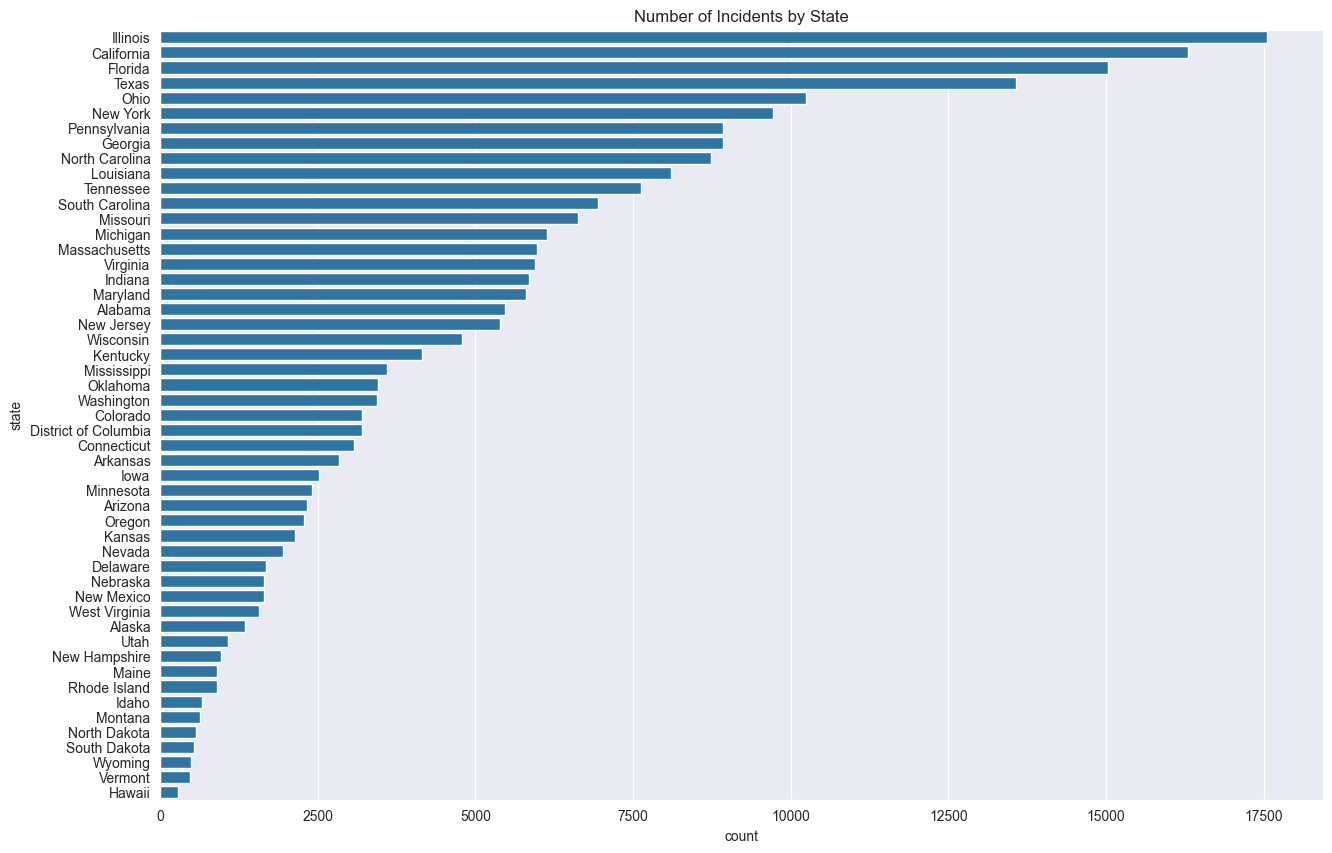

In [ ]:
# Bar plot for the number of incidents by state:
# This will show which states have the highest number of incidents.
plt.figure(figsize=(15,10))
sn.countplot(data=df_incidents, y='state', order=df_incidents['state'].value_counts().index)
plt.title('Number of Incidents by State')
plt.show()

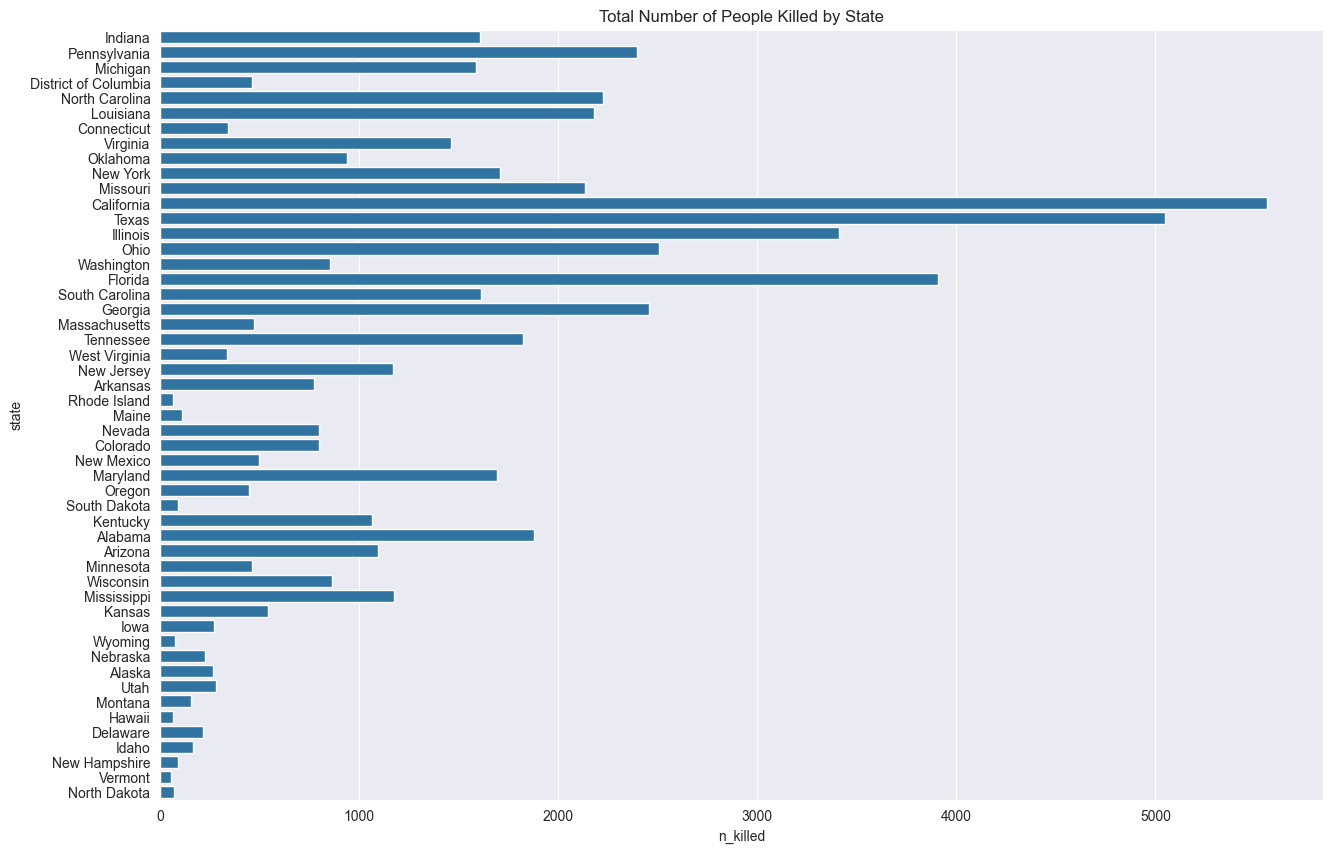

In [ ]:
#Bar plot for number of people killed by state

plt.figure(figsize=(15,10))
sn.barplot(data=df_incidents, y='state', x='n_killed', estimator=sum, errorbar=None)
plt.title('Total Number of People Killed by State')
plt.show()


In [ ]:
# Checking for invalid states
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia'
]

#Added District of Columbia to the valid states even though it not a real state but it is valid

df_incidents['is_valid_state'] = df_incidents['state'].isin(valid_states)
invalid_states = df_incidents[~df_incidents['is_valid_state']]
print(f"Number of records with invalid states: {len(invalid_states)}")

Number of records with invalid states: 0


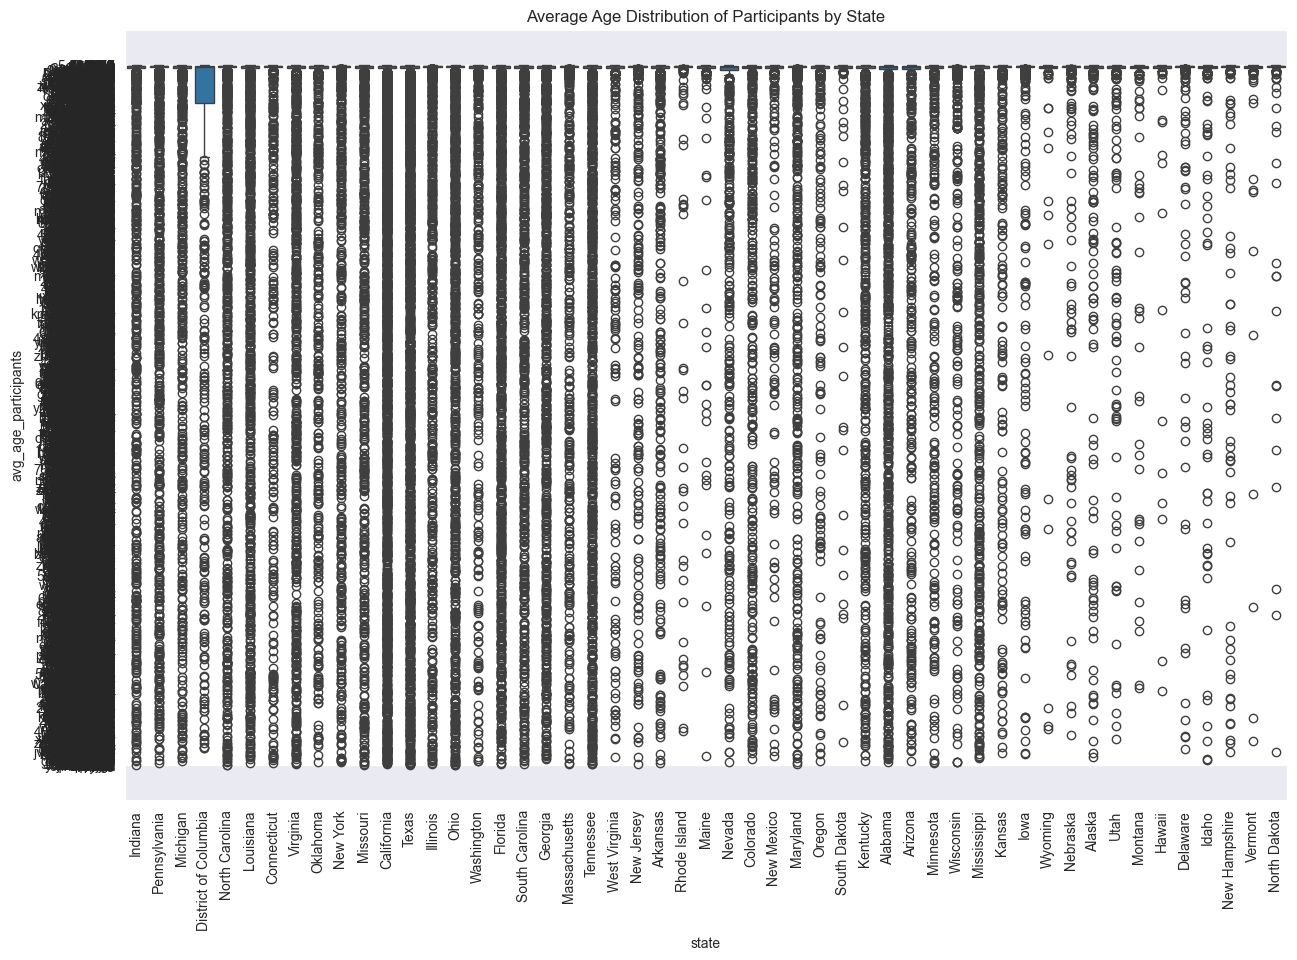

In [ ]:
# Box plot for age distributions by state:
# This can give an idea about the age distribution of participants involved in incidents for each state.

plt.figure(figsize=(15,10))
sn.boxplot(data=df_incidents, x='state', y='avg_age_participants')
plt.xticks(rotation=90)
plt.title('Average Age Distribution of Participants by State')
plt.show()


In [ ]:
# Check for gender consistency
invalid_genders = df_incidents[~df_incidents['participant_gender1'].isin(['Male', 'Female'])]
print(f"Invalid genders:\n{invalid_genders['participant_gender1'].unique()}")

Invalid genders:
[nan 'Male, female']


In [ ]:
##Check for non-negative values for number fields
number_fields = ['n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']
for field in number_fields:
    if df_incidents[df_incidents[field] < 0].shape[0] > 0:
        print(f"Negative values found in {field}")

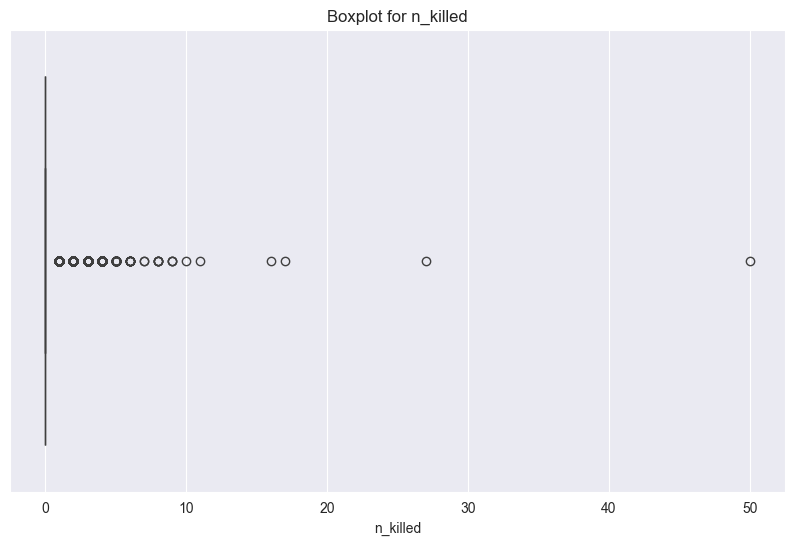

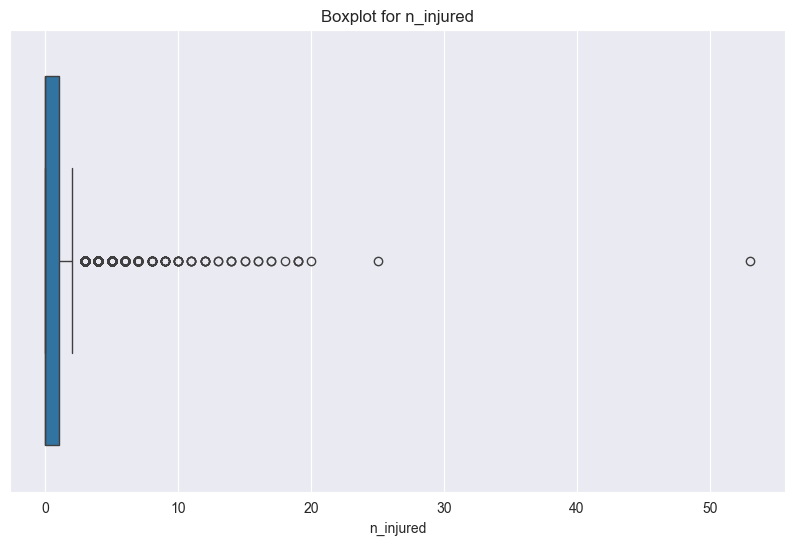

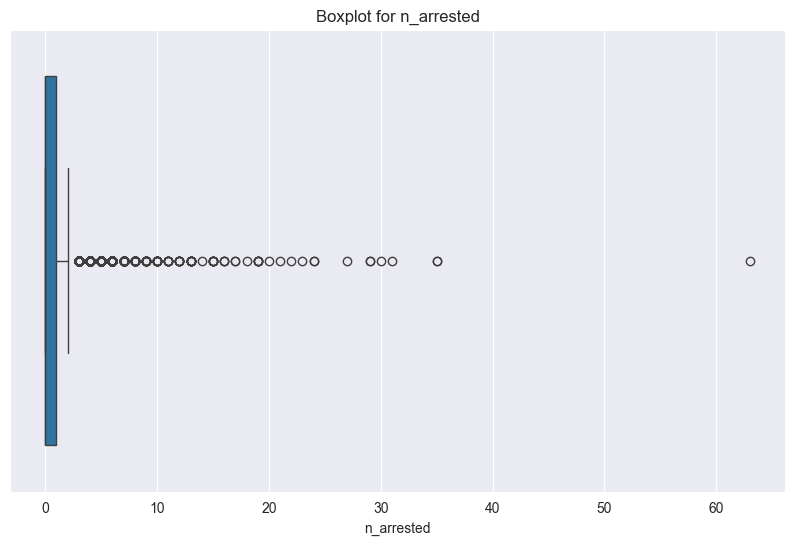

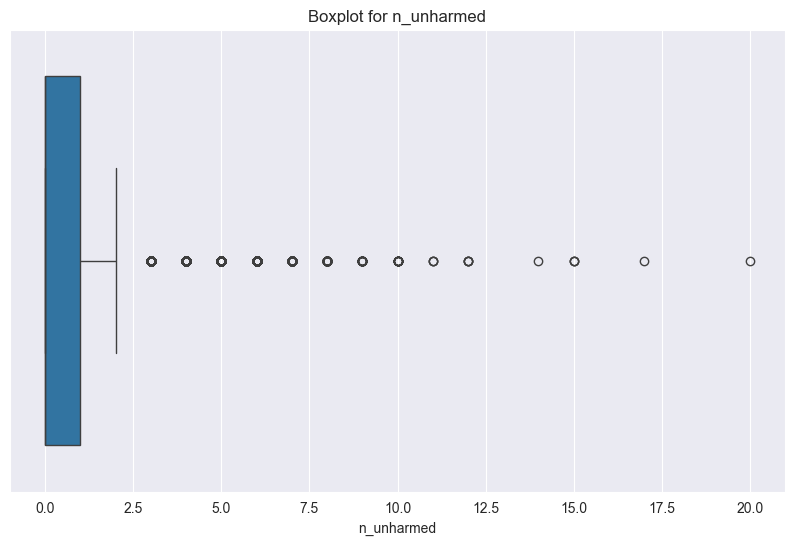

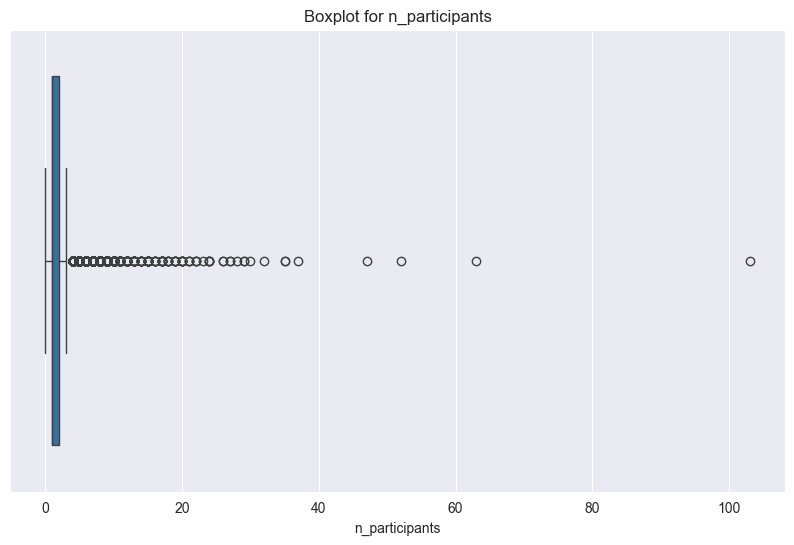

In [ ]:
# 2. Find outliers
## a. Boxplots are a great way to visualize outliers
for field in number_fields:
    plt.figure(figsize=(10,6))
    sn.boxplot(x=df_incidents[field])
    plt.title(f"Boxplot for {field}")
    plt.show()

In [ ]:
# 3. Detect and examine missing values & potential default values
## a. Check for missing values
missing_values = df_incidents.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         74798
avg_age_participants         74620
max_age_participants         74708
n_participants_child         42109
n_participants_teen          42106
n_participants_adult         42105
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
is_v

In [ ]:
## b. Check for default or placeholder values (e.g. 9999 or -1)
for field in number_fields:
    suspicious_values = df_incidents[df_incidents[field] == 9999].shape[0] # replace 9999 with any suspicious value
    if suspicious_values:
        print(f"Suspicious values found in {field}")

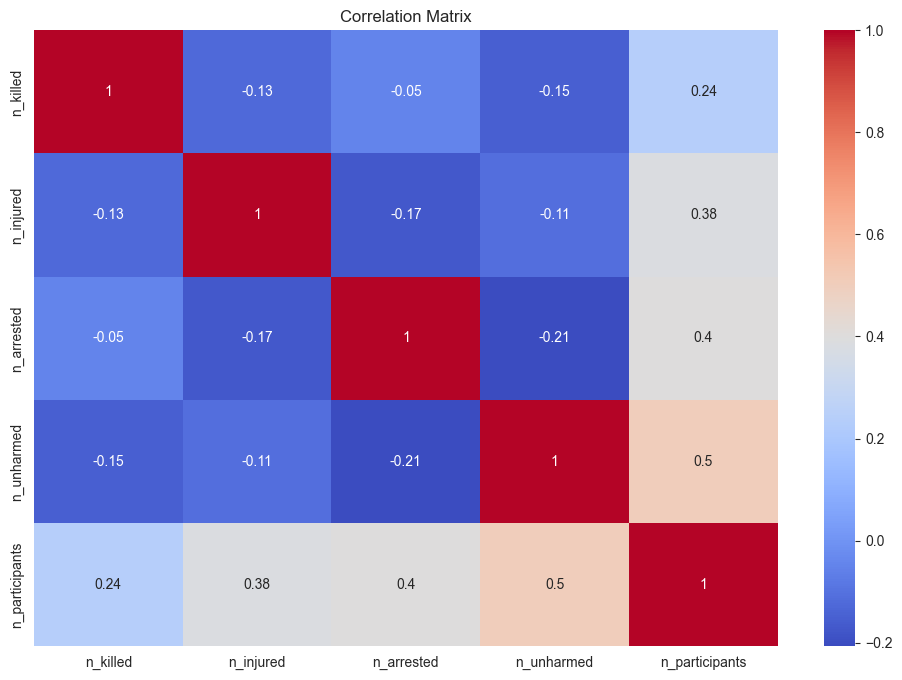

In [ ]:
# 4. Discover new or confirm expected dependencies or correlations between attributes
correlation_matrix = df_incidents[number_fields].corr()
plt.figure(figsize=(12,8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

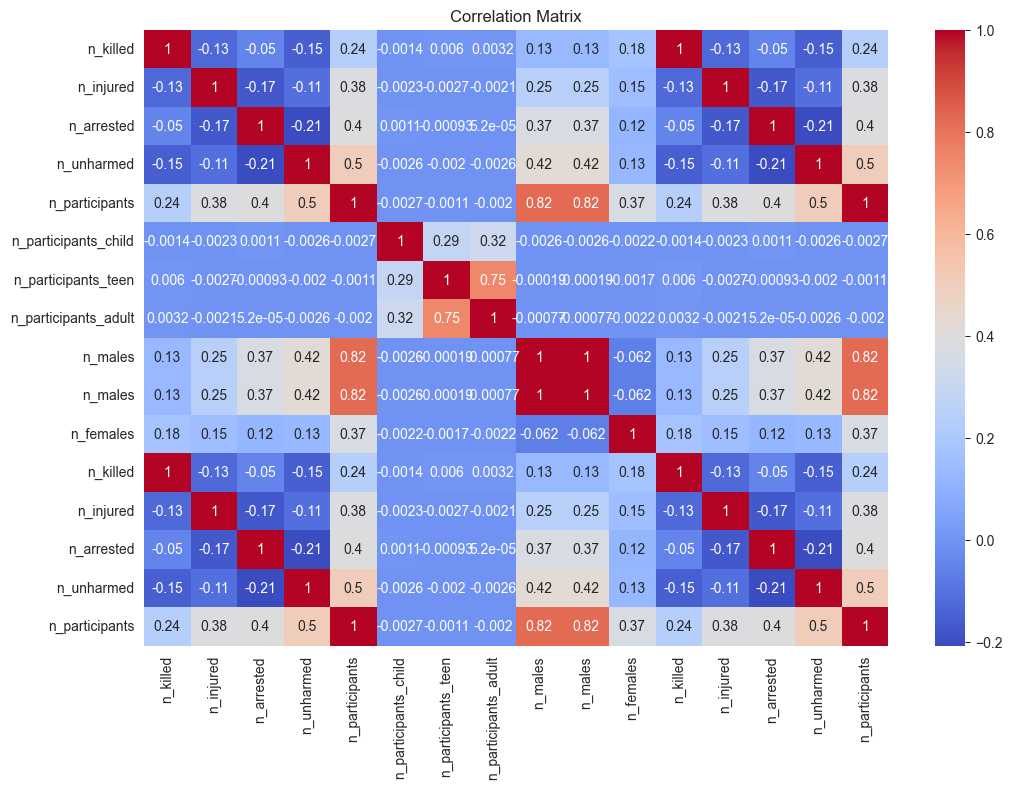

In [ ]:
number_fields = ['n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']

correlation_matrix = df_incidents[number_fields].corr()
plt.figure(figsize=(12,8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1000x600 with 0 Axes>

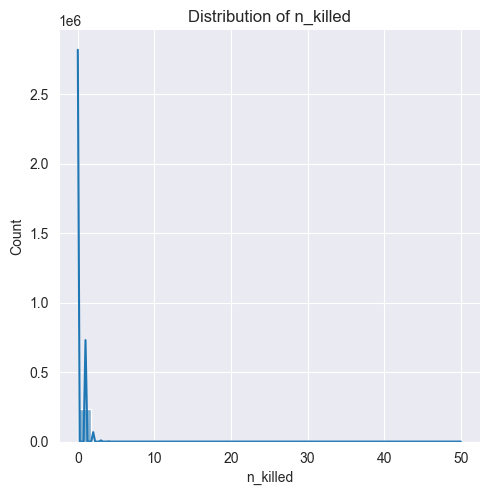

<Figure size 1000x600 with 0 Axes>

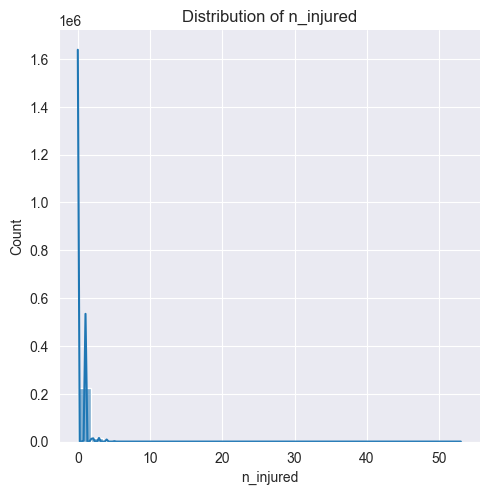

<Figure size 1000x600 with 0 Axes>

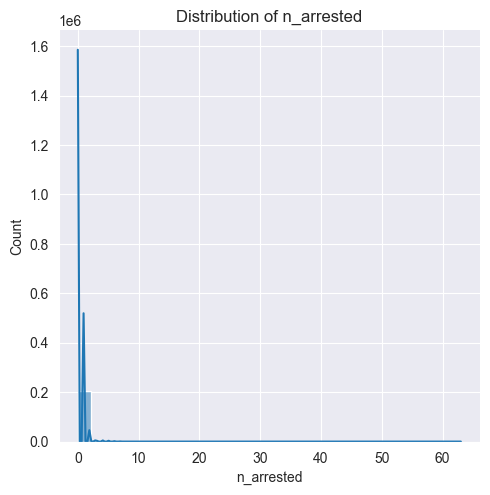

<Figure size 1000x600 with 0 Axes>

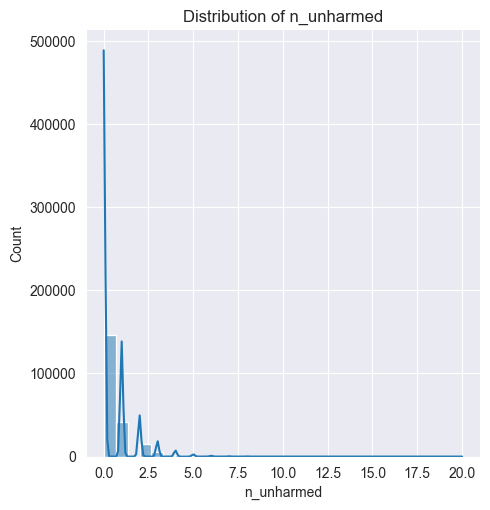

<Figure size 1000x600 with 0 Axes>

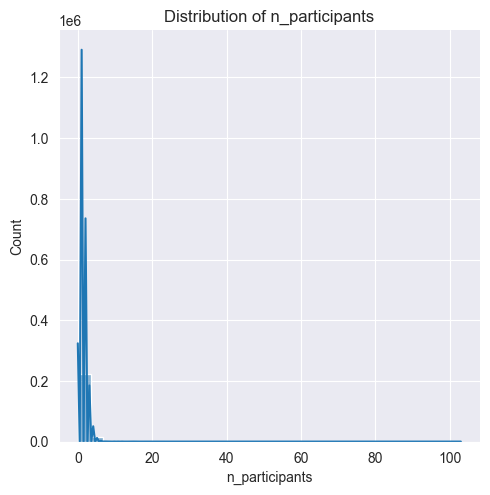

<Figure size 1000x600 with 0 Axes>

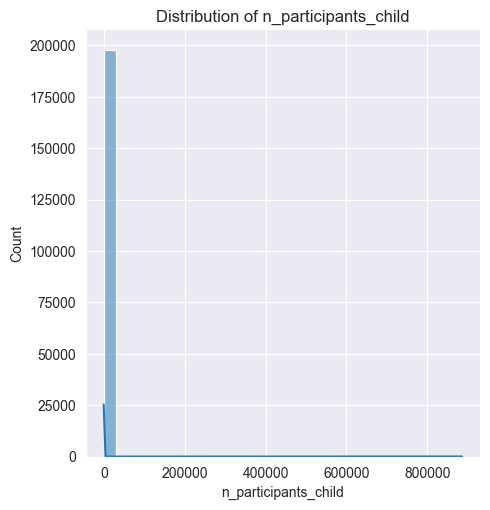

<Figure size 1000x600 with 0 Axes>

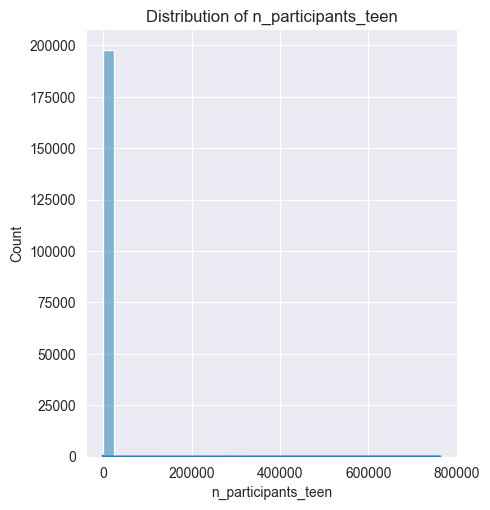

<Figure size 1000x600 with 0 Axes>

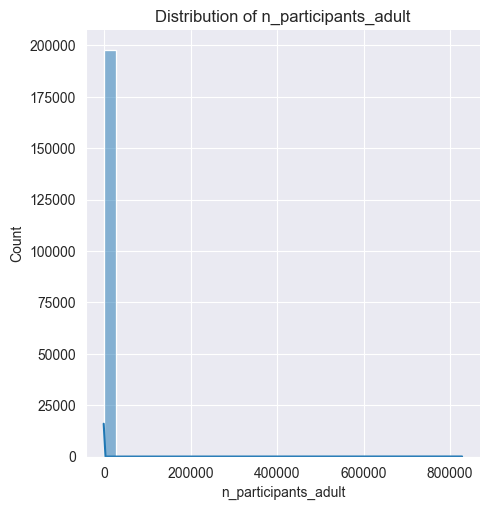

<Figure size 1000x600 with 0 Axes>

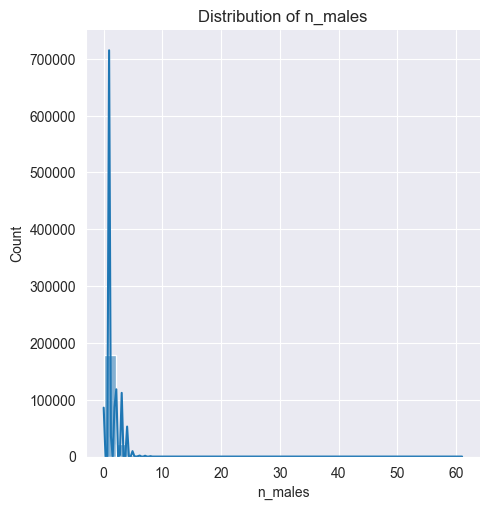

<Figure size 1000x600 with 0 Axes>

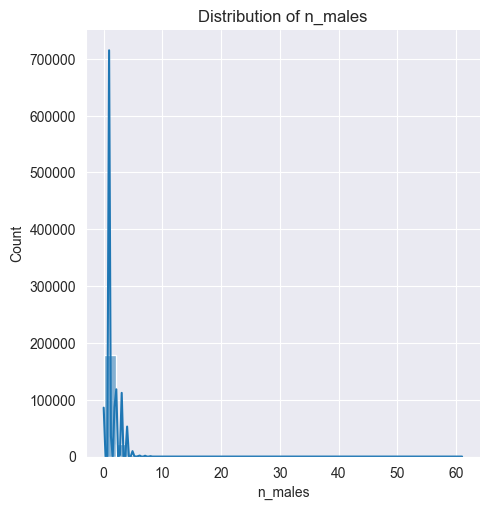

<Figure size 1000x600 with 0 Axes>

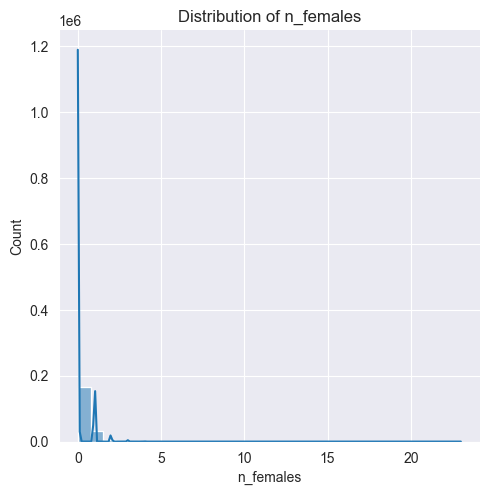

<Figure size 1000x600 with 0 Axes>

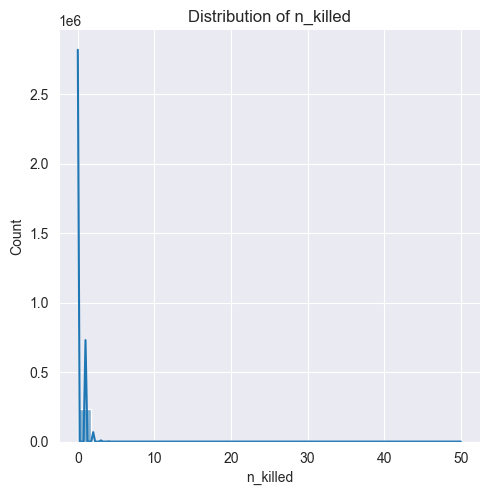

<Figure size 1000x600 with 0 Axes>

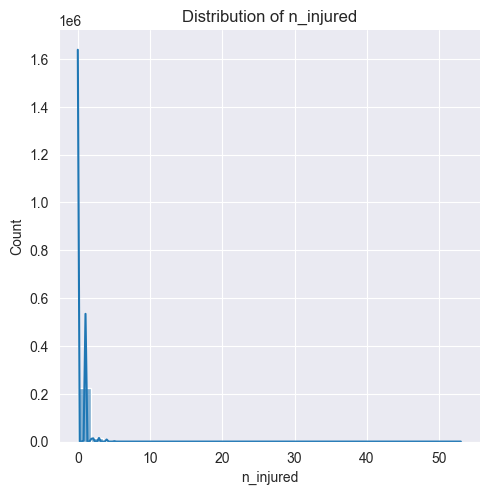

<Figure size 1000x600 with 0 Axes>

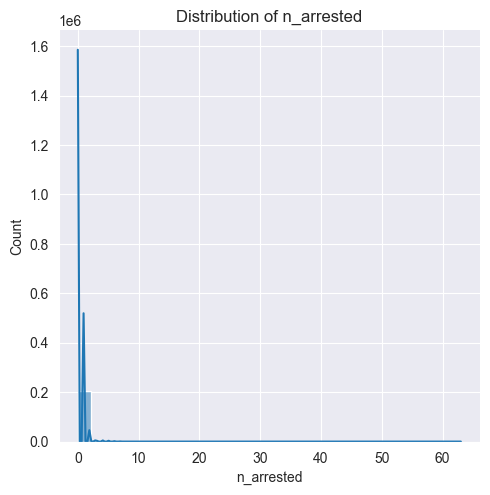

<Figure size 1000x600 with 0 Axes>

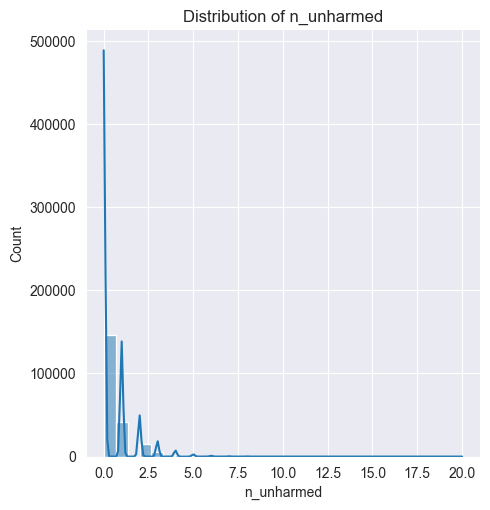

<Figure size 1000x600 with 0 Axes>

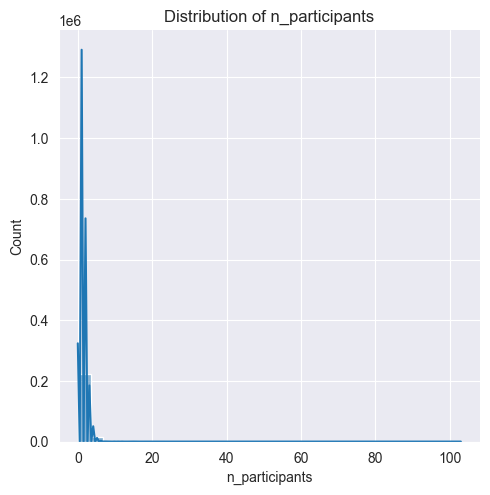

In [ ]:
# 5. Check specific application dependent assumptions (like normal distribution)
## a. Check for normal distribution
for field in number_fields:
    plt.figure(figsize=(10,6))
    sn.displot(df_incidents[field].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {field}")
    plt.show()

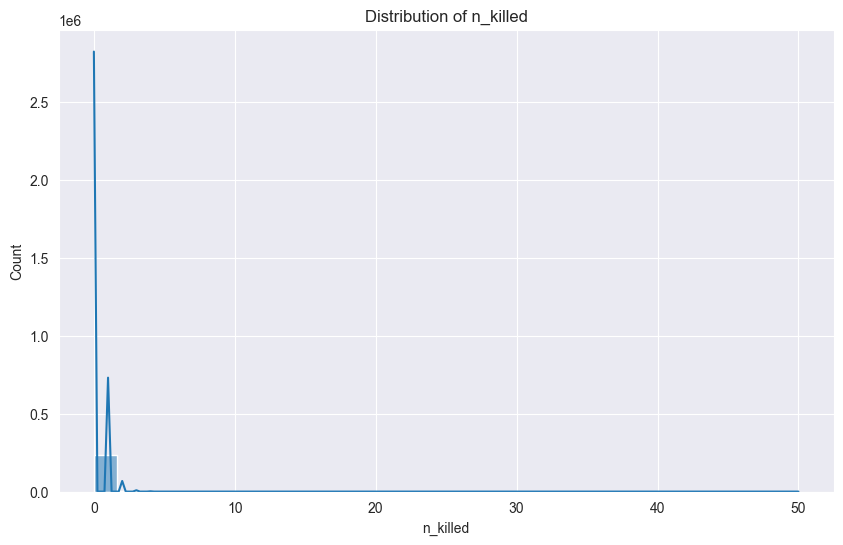

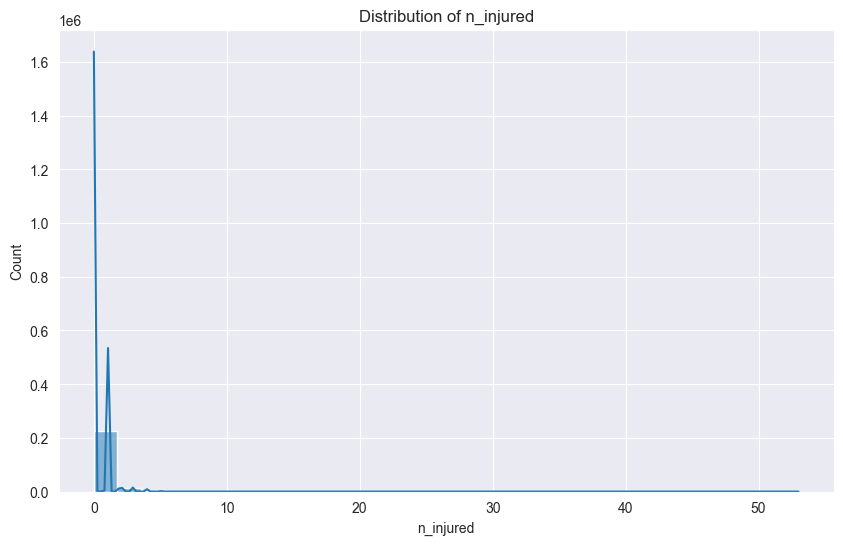

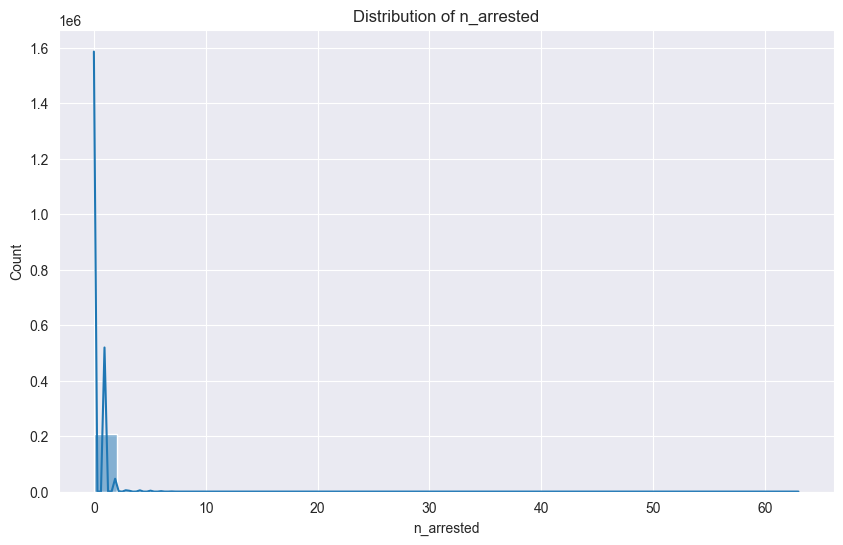

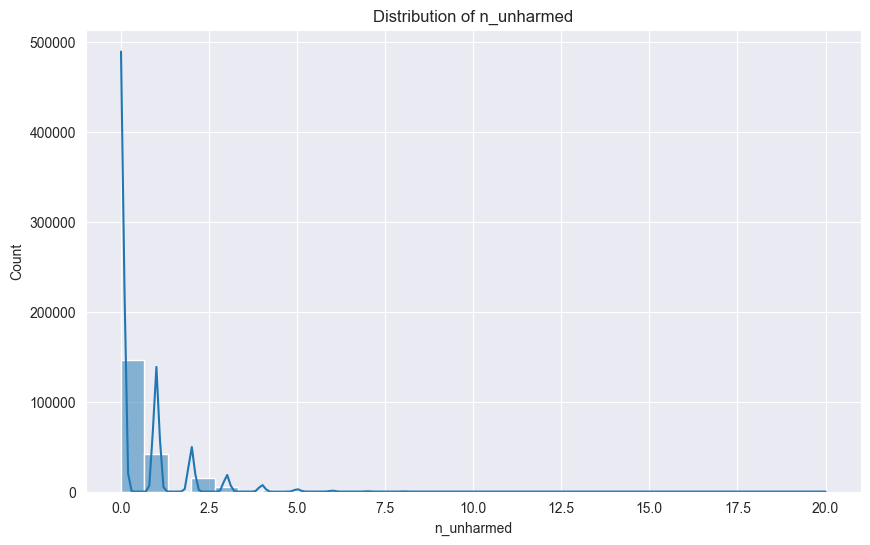

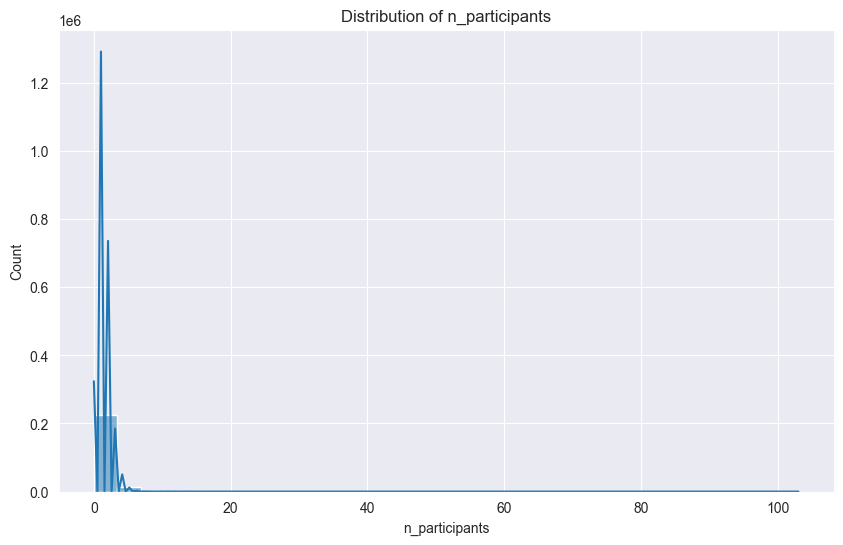

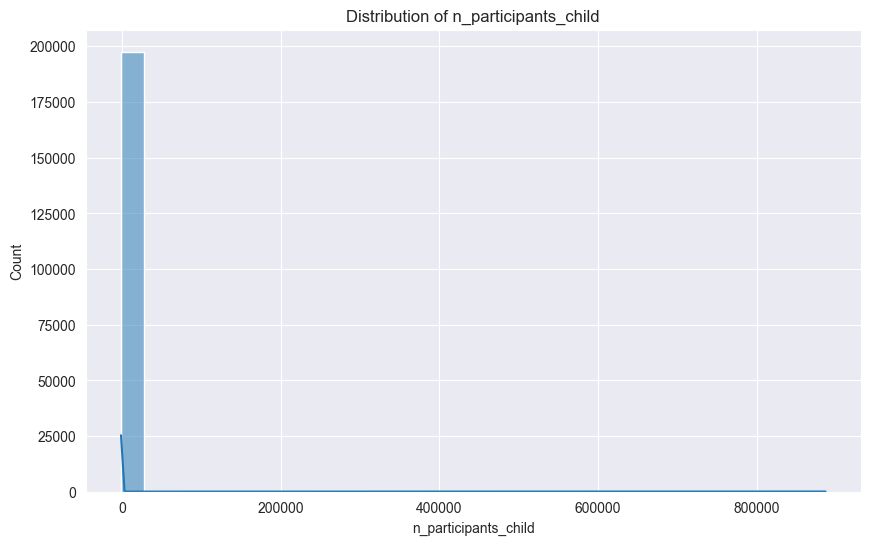

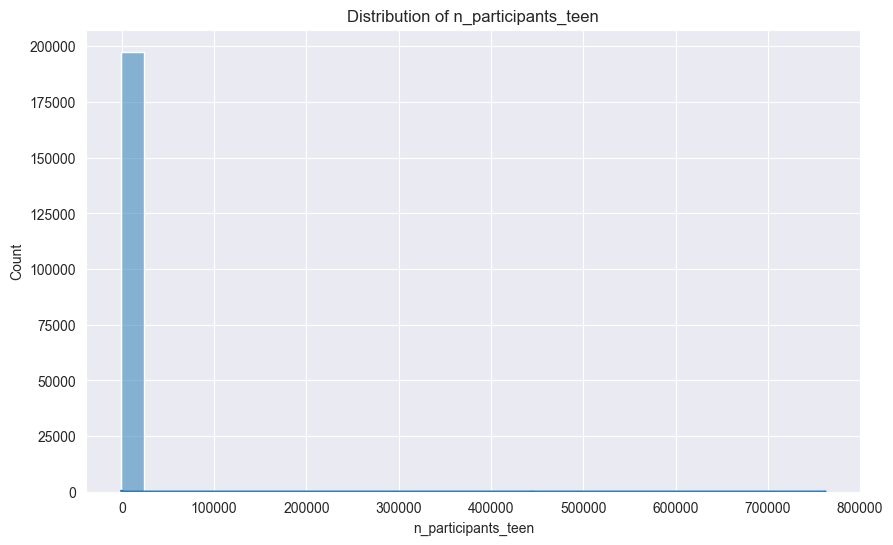

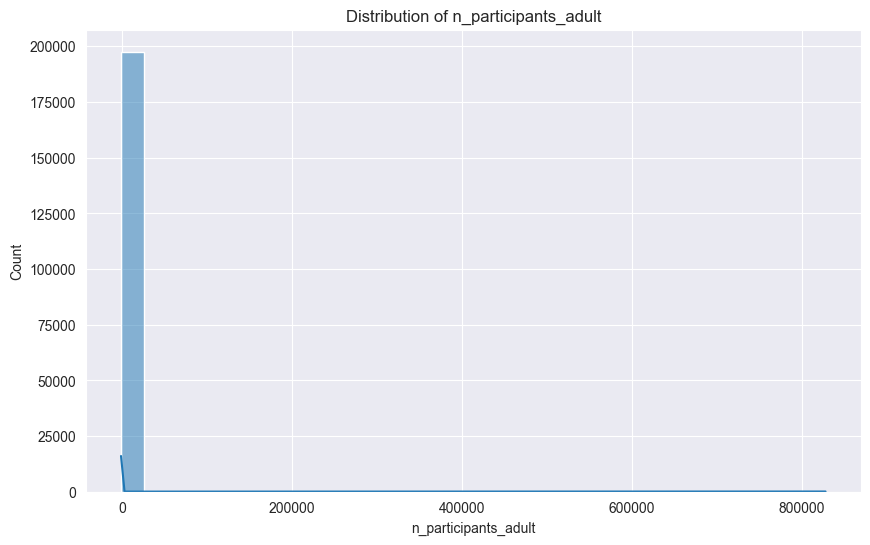

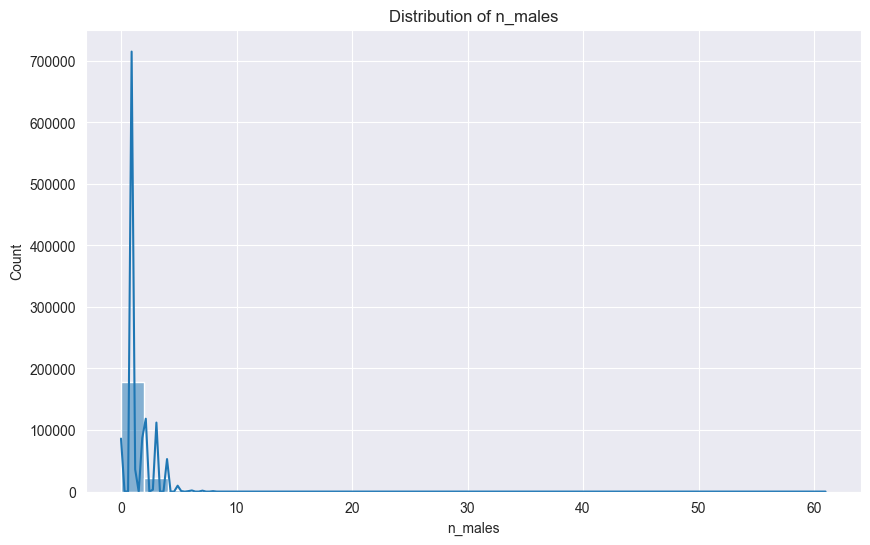

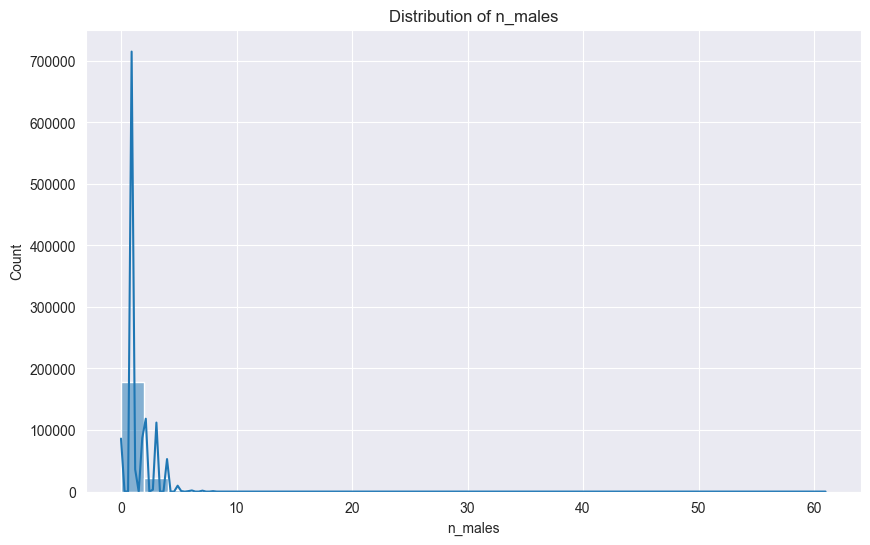

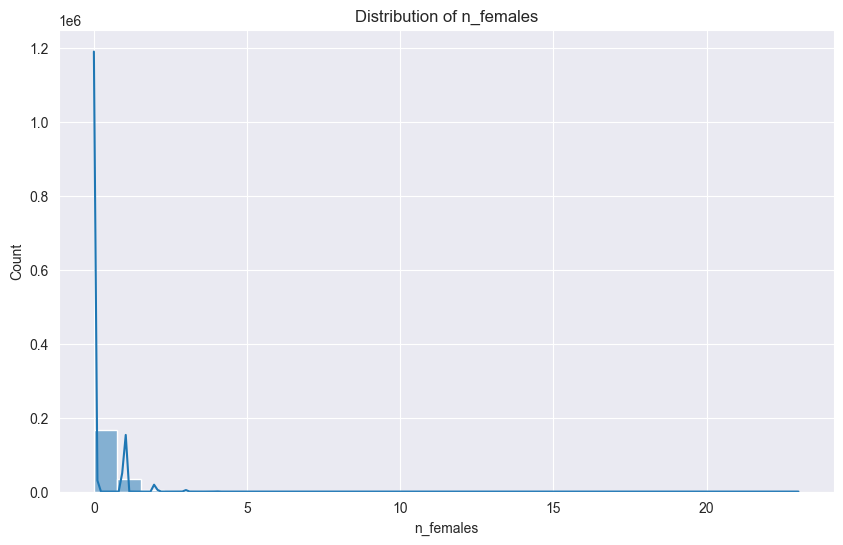

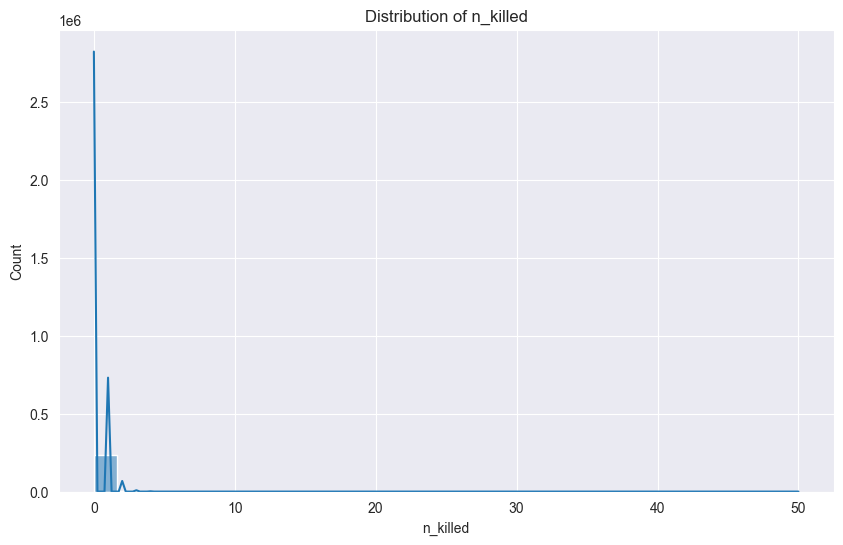

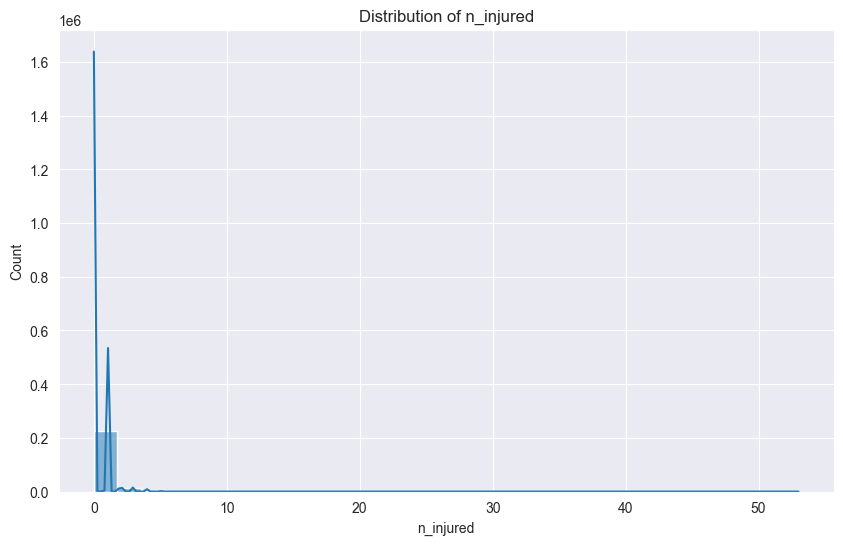

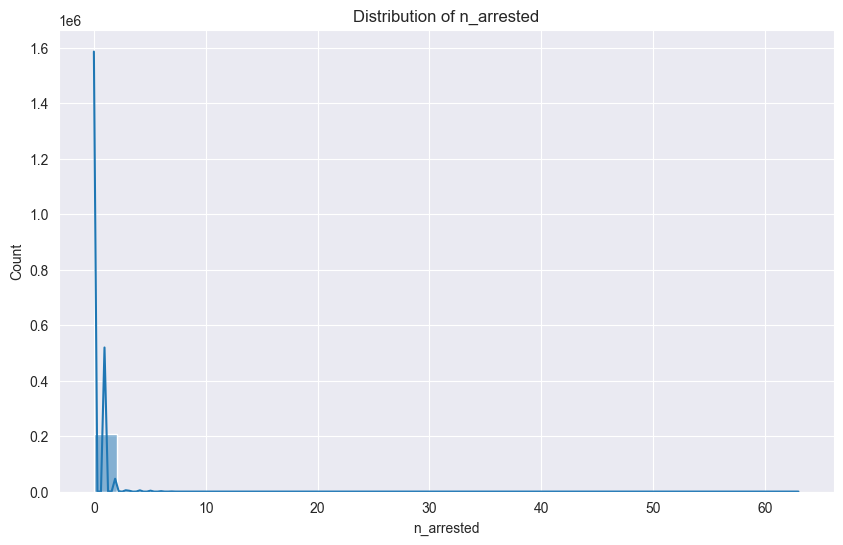

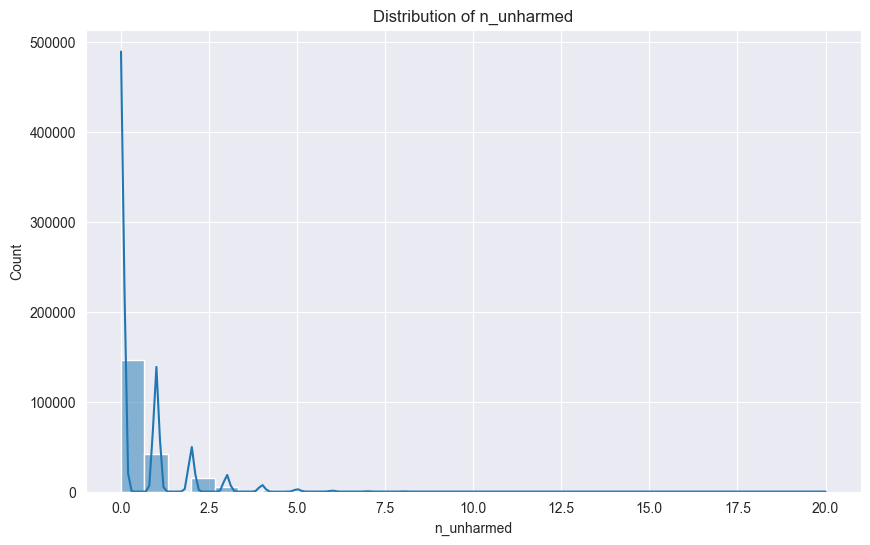

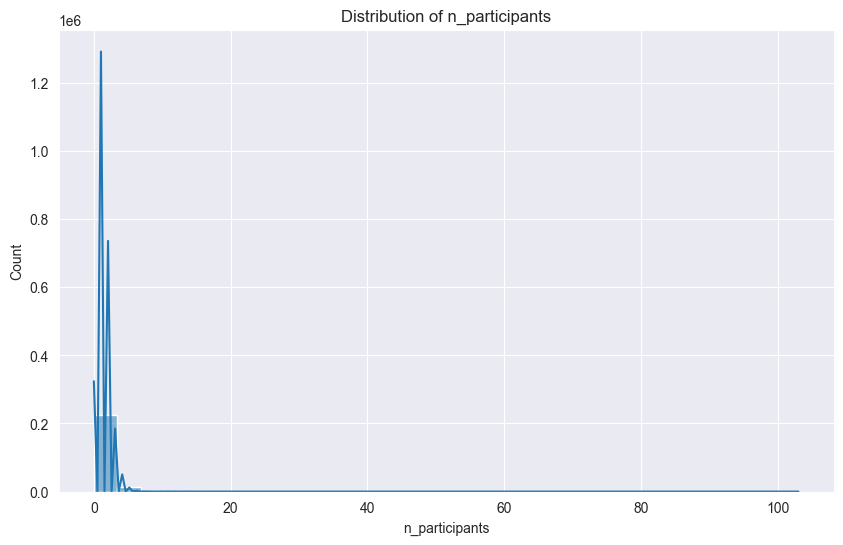

In [ ]:
for field in number_fields:
    plt.figure(figsize=(10,6))
    sn.histplot(df_incidents[field].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {field}")
    plt.show()

In [ ]:
actual_mean_n_killed = df_incidents['n_killed'].mean()
print(f"Mean number killed({actual_mean_n_killed})")

Mean number killed(0.25228953967214207)


In [ ]:
# 6. Compare statistics with expected behavior
## For this part, you need to have a priori expectations. For demonstration:
expected_mean_n_killed = 2  # This is just an example value
actual_mean_n_killed = df_incidents['n_killed'].mean()
print(f"Mean number killed({actual_mean_n_killed})")
if actual_mean_n_killed > expected_mean_n_killed:
    print(f"Actual mean of n_killed ({actual_mean_n_killed}) is greater than expected ({expected_mean_n_killed})")

Mean number killed(0.25228953967214207)


C:\Users\ASUS\.virtualenvs\teamwork\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


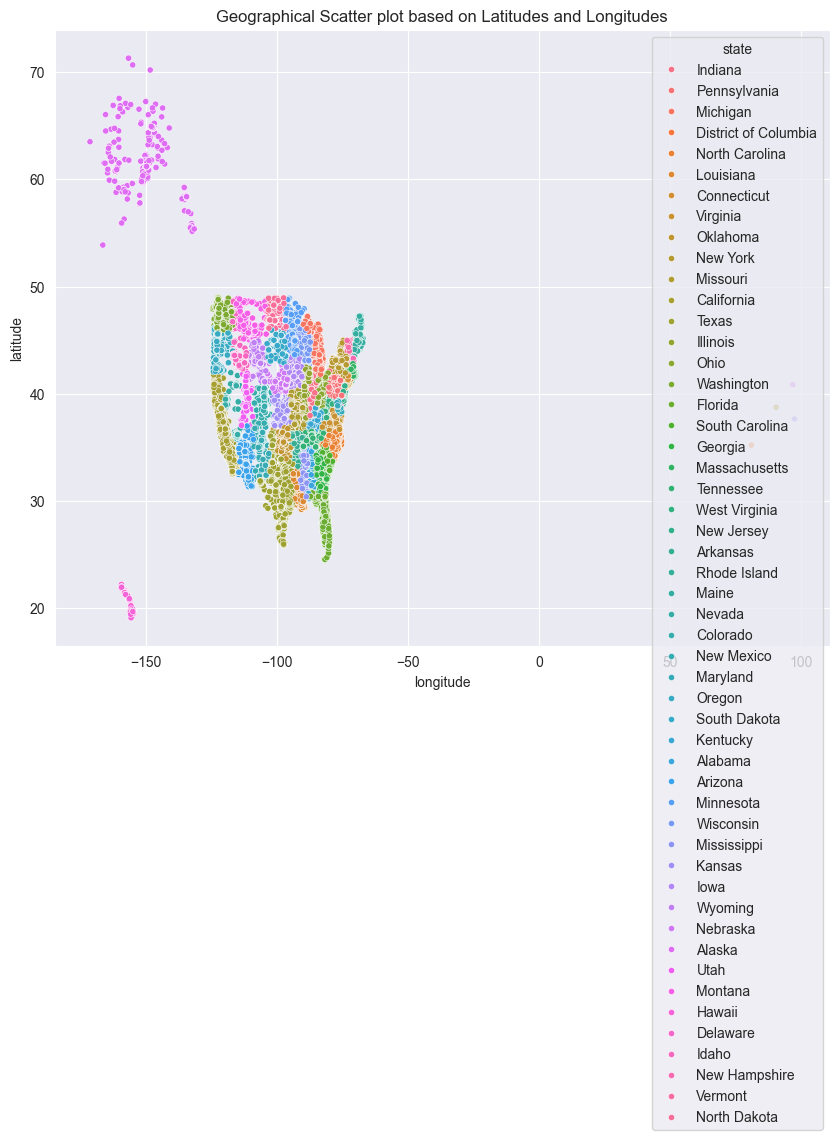

In [ ]:
# Addressing the latitude and longitude attributes to visualize data geographically
plt.figure(figsize=(10, 8))
sn.scatterplot(x=df_incidents['longitude'], y=df_incidents['latitude'], hue=df_incidents['state'], legend=True, s=20)
plt.title("Geographical Scatter plot based on Latitudes and Longitudes")
plt.show()

In [ ]:
df_incidents['date'] = pd.to_datetime(df_incidents['date'])
#Convert to DateTime type

In [ ]:
# Extract Year, Month, Day, and other components
df_incidents['year'] = df_incidents['date'].dt.year
df_incidents['month'] = df_incidents['date'].dt.month
df_incidents['day'] = df_incidents['date'].dt.day
df_incidents['weekday'] = df_incidents['date'].dt.weekday  # Where Monday is 0 and Sunday is 6



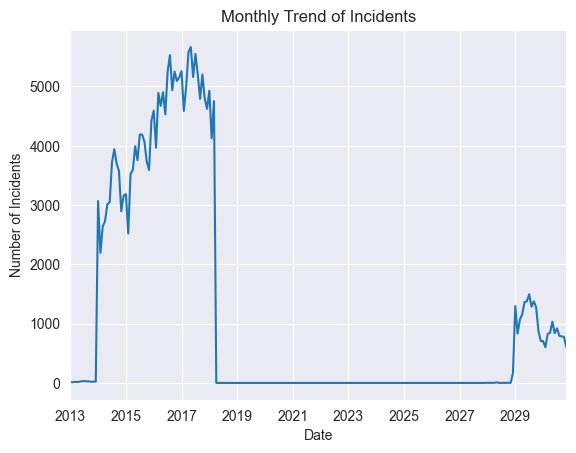

In [ ]:
#Time Series Analysis
monthly_incidents = df_incidents.resample('M', on='date').size()
monthly_incidents.plot()
plt.title('Monthly Trend of Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()


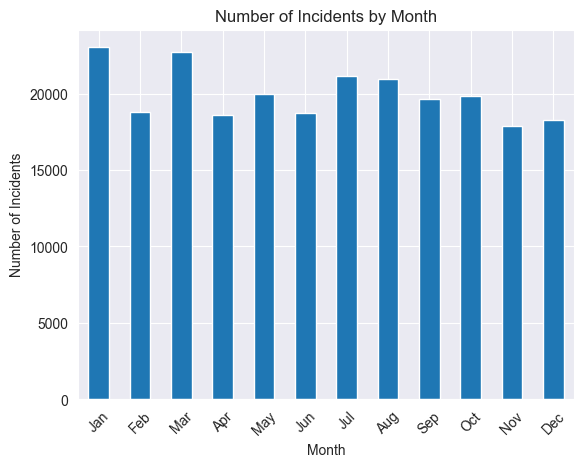

In [ ]:
#Seasonal analysis
#To see if there's a pattern during certain months

# Group by month and count the number of incidents
monthly_incidents = df_incidents.groupby(df_incidents['date'].dt.month).size()

# Plotting
monthly_incidents.plot(kind='bar')
plt.title('Number of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()



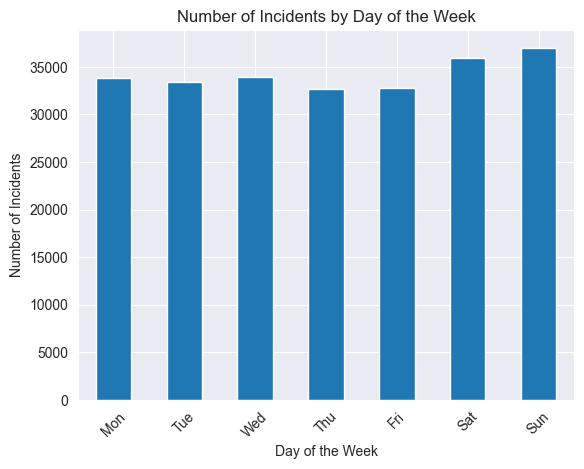

In [ ]:
# Day-of-week analysis
# To see if there's a pattern on certain days of the week

# Group by day of the week and count the number of incidents
# Note: By default, Monday=0 and Sunday=6
daily_incidents = df_incidents.groupby(df_incidents['date'].dt.dayofweek).size()

# Plotting
daily_incidents.plot(kind='bar')
plt.title('Number of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


In [ ]:
# Ensure the 'date' column is in datetime format
df_incidents['date'] = pd.to_datetime(df_incidents['date'])

# Filter out rows with dates in the future
df_incidents = df_incidents[df_incidents['date'] <= pd.Timestamp.now()]

# Now, you can proceed with your further analysis


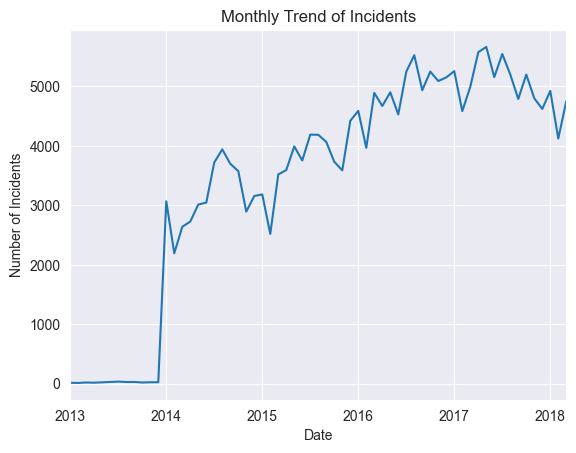

In [ ]:
#Time Series Analysis After Removing future Dates
monthly_incidents = df_incidents.resample('M', on='date').size()
monthly_incidents.plot()
plt.title('Monthly Trend of Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()
